In [ ]:
!pip uninstall lightgbm

Found existing installation: lightgbm 4.1.0
Uninstalling lightgbm-4.1.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/lightgbm-4.1.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/lightgbm/*
Proceed (Y/n)? y
  Successfully uninstalled lightgbm-4.1.0


# Download the required libries

In [ ]:
from IPython.display import clear_output
!pip install plotly --upgrade
!pip install catboost
!pip install scikit-optimize
!pip install lightgbm --config-settings=cmake.define.USE_GPU=ON
!pip install lightgbm --config-settings=cmake.define.USE_CUDA=ON
clear_output()

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Dataset

In [ ]:
# Load the datasets
train_df = pd.read_csv('/content/HOUSE PRICE PREDICTION_SEATTLE_train_dataset.csv')
test_df = pd.read_csv('/content/HOUSE PRICE PREDICTION_SEATTLE_test_dataset.csv')

# Check the heading and bottom of the training dataset

In [ ]:
train_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


# Check the heading and bottom of the testing dataset

In [ ]:
test_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


# EDA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [ ]:
train_df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [ ]:
test_df.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


# Checking the missing value on training dataset

In [ ]:
train_df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

# Checking the missing value on testing dataset

In [ ]:
test_df.isnull().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

# Filling the missing values on both training and testing dataset

In [ ]:
# Fill missing lot_size with the median
train_df['lot_size'].fillna(train_df['lot_size'].median(), inplace=True)
test_df['lot_size'].fillna(test_df['lot_size'].median(), inplace=True)

In [ ]:
# Fill missing lot_size_units with the mode
train_lot_size_units_mode = train_df['lot_size_units'].mode()[0]
test_lot_size_units_mode = test_df['lot_size_units'].mode()[0]

In [ ]:
train_df['lot_size_units'].fillna(train_lot_size_units_mode, inplace=True)
test_df['lot_size_units'].fillna(test_lot_size_units_mode, inplace=True)

In [ ]:
train_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,4000.00,sqft,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,4000.00,sqft,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,4000.00,sqft,98103,590000.0


In [ ]:
test_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


# Now lets a verify the missing values is this fill?

In [ ]:
train_df.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [ ]:
test_df.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

# the missing values filled with median and mode

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        2016 non-null   float64
 5   lot_size_units  2016 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical variables
le_size_units = LabelEncoder()
le_lot_size_units = LabelEncoder()

In [ ]:
train_df['size_units'] = le_size_units.fit_transform(train_df['size_units'])
test_df['size_units'] = le_size_units.transform(test_df['size_units'])

In [ ]:
train_df['lot_size_units'] = le_lot_size_units.fit_transform(train_df['lot_size_units'])
test_df['lot_size_units'] = le_lot_size_units.transform(test_df['lot_size_units'])

# Verify changes

In [ ]:
train_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,0,6000.00,1,98144,795000.0
1,4,2.0,2240.0,0,0.31,0,98106,915000.0
2,4,3.0,2040.0,0,3783.00,1,98107,950000.0
3,4,3.0,3800.0,0,5175.00,1,98199,1950000.0
4,2,2.0,1042.0,0,4000.00,1,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,0,0.50,0,98112,910000.0
2012,1,1.0,889.0,0,4000.00,1,98121,550000.0
2013,4,2.0,2140.0,0,6250.00,1,98199,1150000.0
2014,2,2.0,795.0,0,4000.00,1,98103,590000.0


In [ ]:
test_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,0,4200.00,1,98119,1175000.0
1,4,5.0,3040.0,0,5002.00,1,98106,1057500.0
2,3,1.0,1290.0,0,6048.00,1,98125,799000.0
3,3,2.0,2360.0,0,0.28,0,98188,565000.0
4,3,3.5,1942.0,0,1603.00,1,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,0,0.30,0,98146,3800000.0
501,3,2.5,1390.0,0,1570.00,1,98126,575000.0
502,3,2.5,2950.0,0,0.47,0,98118,3105000.0
503,5,5.0,3010.0,0,4887.00,1,98115,1807000.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   int64  
 4   lot_size        2016 non-null   float64
 5   lot_size_units  2016 non-null   int64  
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 126.1 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

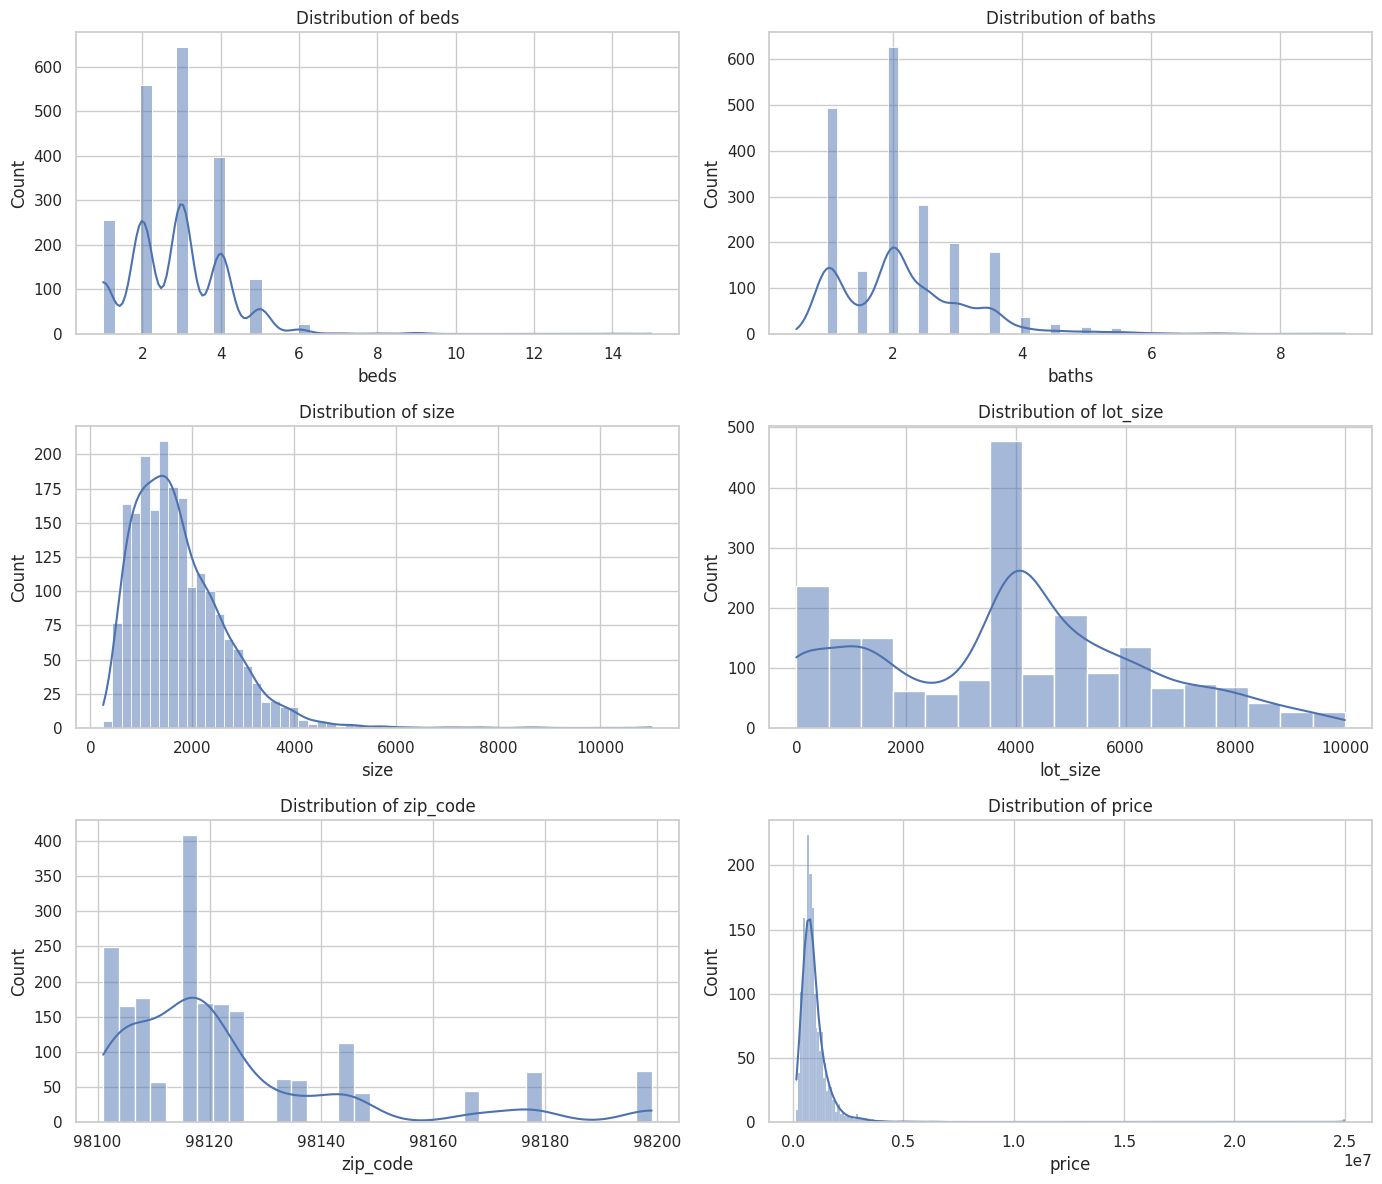

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting distributions of numerical features
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Histograms for numerical features
num_features = ['beds', 'baths', 'size', 'lot_size', 'zip_code','price']
for i, feature in enumerate(num_features):
    sns.histplot(train_df[feature], kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()

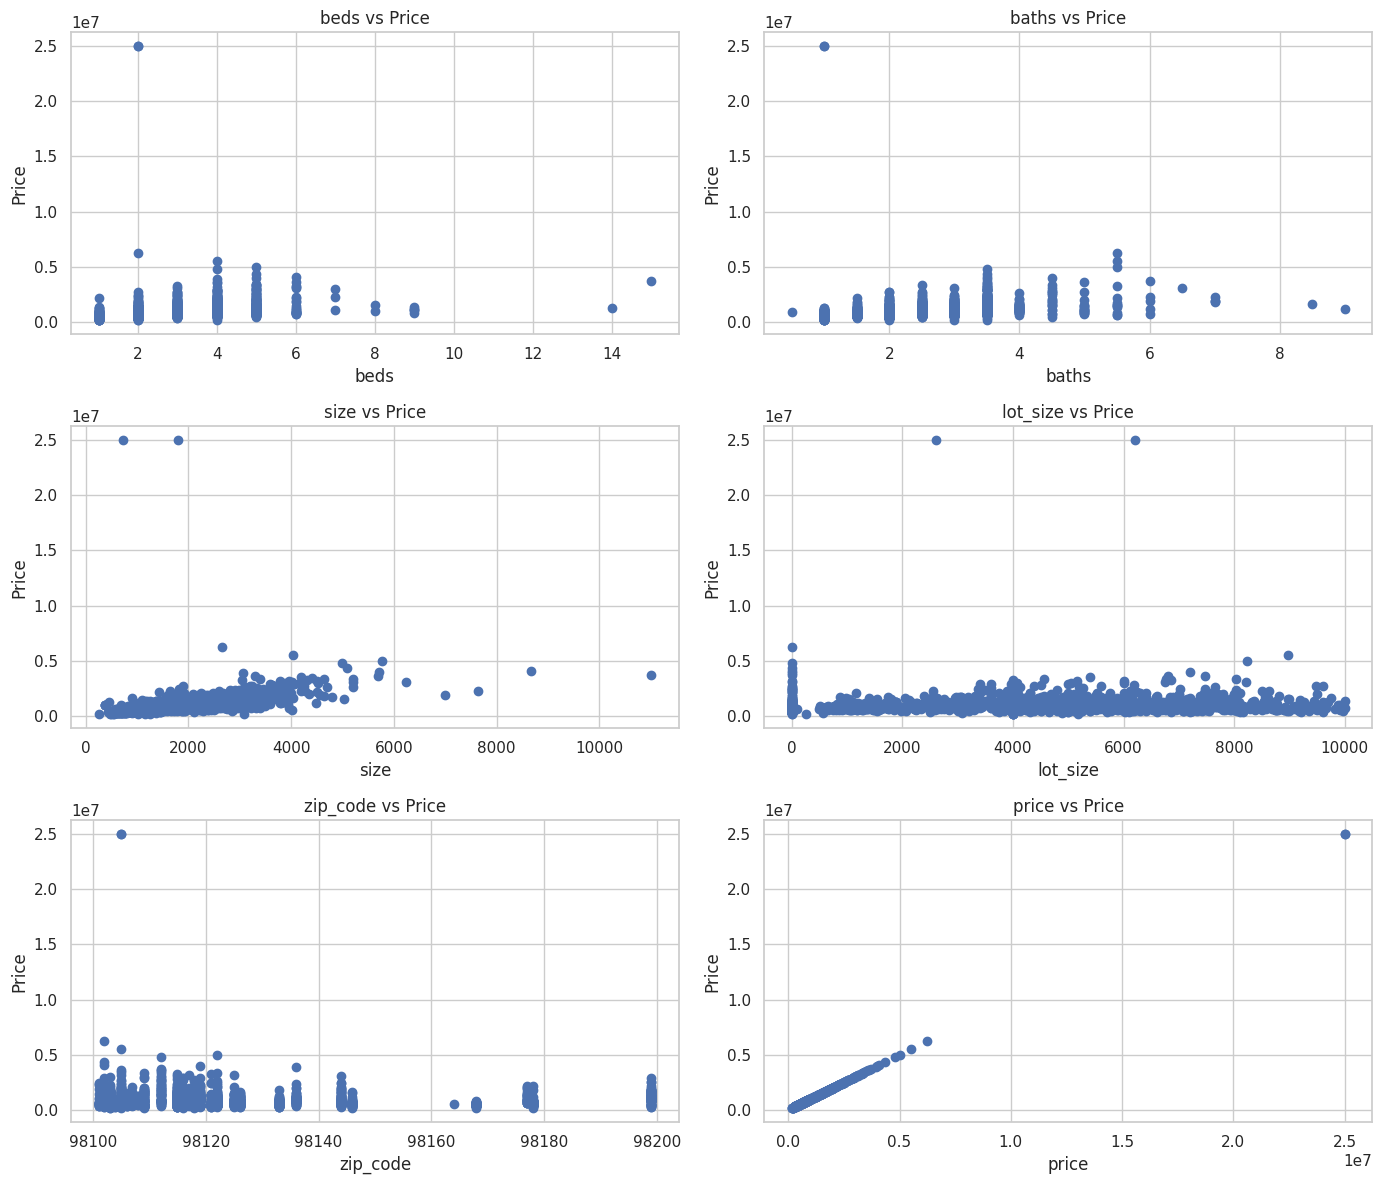

In [ ]:
# Scatter plots for relationships with price
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

for i, feature in enumerate(num_features):
    axs[i//2, i%2].scatter(train_df[feature], train_df['price'])
    axs[i//2, i%2].set_xlabel(feature)
    axs[i//2, i%2].set_ylabel('Price')
    axs[i//2, i%2].set_title(f'{feature} vs Price')

plt.tight_layout()

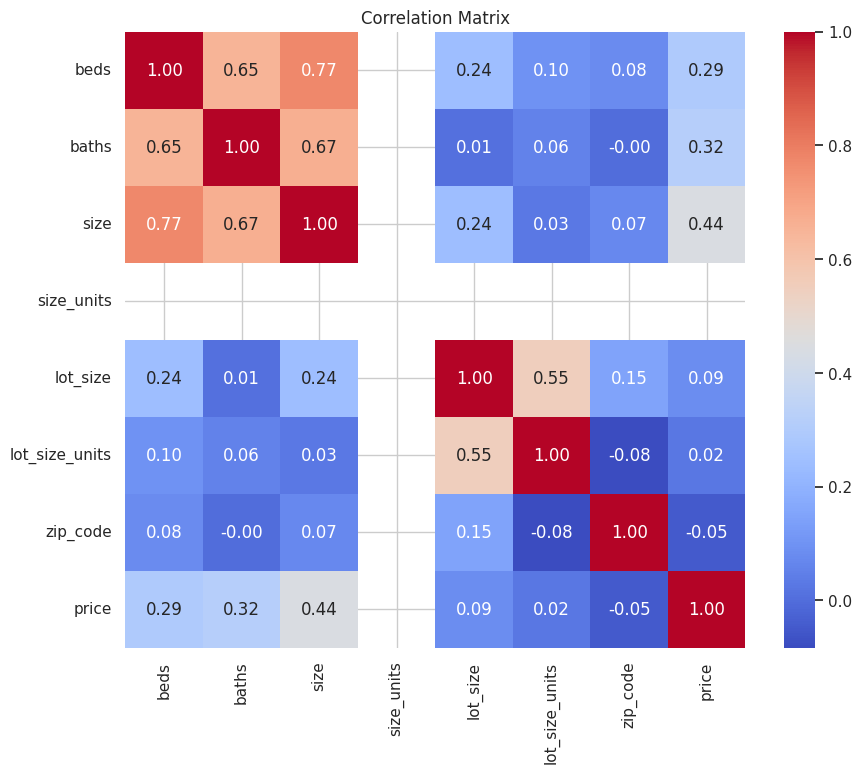

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

<Axes: title={'center': 'Boxplot Beds'}, xlabel='beds'>

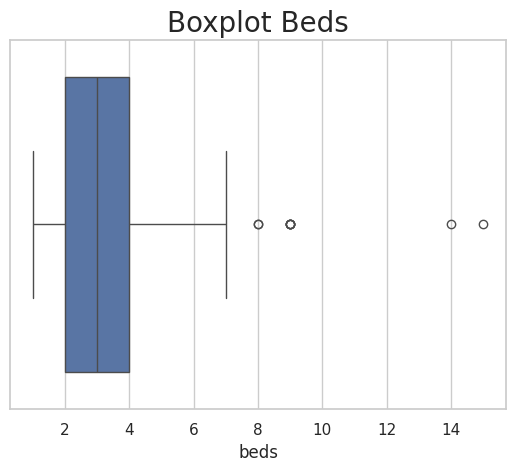

In [ ]:
plt.title("Boxplot Beds", fontdict = {'fontsize': 20})
sns.boxplot(x=train_df["beds"])

In [ ]:
train_df = train_df[train_df['beds'] < 10]

<Axes: title={'center': 'Boxplot Beds Without Outliers'}, xlabel='beds'>

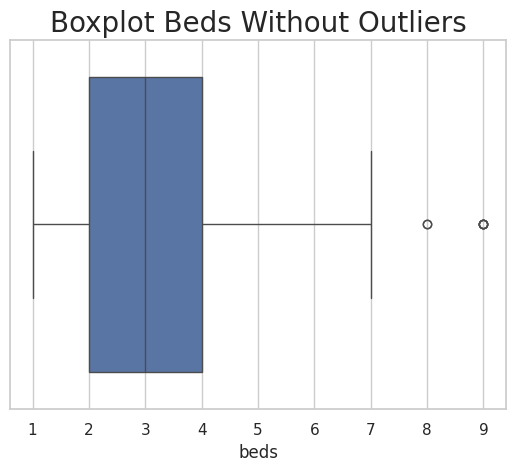

In [ ]:
plt.title("Boxplot Beds Without Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=train_df["beds"])

Looking at the bathroom variable, we can see that we have 2 values ​​to the right, but the difference is not that big when compared to most values.

<Axes: title={'center': 'Boxplot Baths'}, xlabel='baths'>

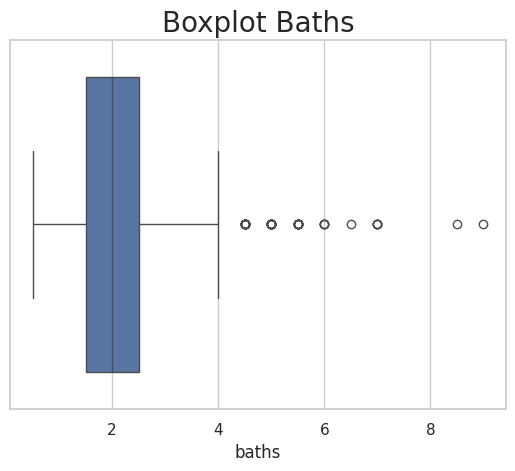

In [ ]:
plt.title("Boxplot Baths", fontdict = {'fontsize': 20})
sns.boxplot(x=train_df["baths"])

In [ ]:
train_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,0,6000.00,1,98144,795000.0
1,4,2.0,2240.0,0,0.31,0,98106,915000.0
2,4,3.0,2040.0,0,3783.00,1,98107,950000.0
3,4,3.0,3800.0,0,5175.00,1,98199,1950000.0
4,2,2.0,1042.0,0,4000.00,1,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,0,0.50,0,98112,910000.0
2012,1,1.0,889.0,0,4000.00,1,98121,550000.0
2013,4,2.0,2140.0,0,6250.00,1,98199,1150000.0
2014,2,2.0,795.0,0,4000.00,1,98103,590000.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2014 non-null   int64  
 1   baths           2014 non-null   float64
 2   size            2014 non-null   float64
 3   size_units      2014 non-null   int64  
 4   lot_size        2014 non-null   float64
 5   lot_size_units  2014 non-null   int64  
 6   zip_code        2014 non-null   int64  
 7   price           2014 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 141.6 KB


# Visualizing Outliers

# Training Dataset Outliers

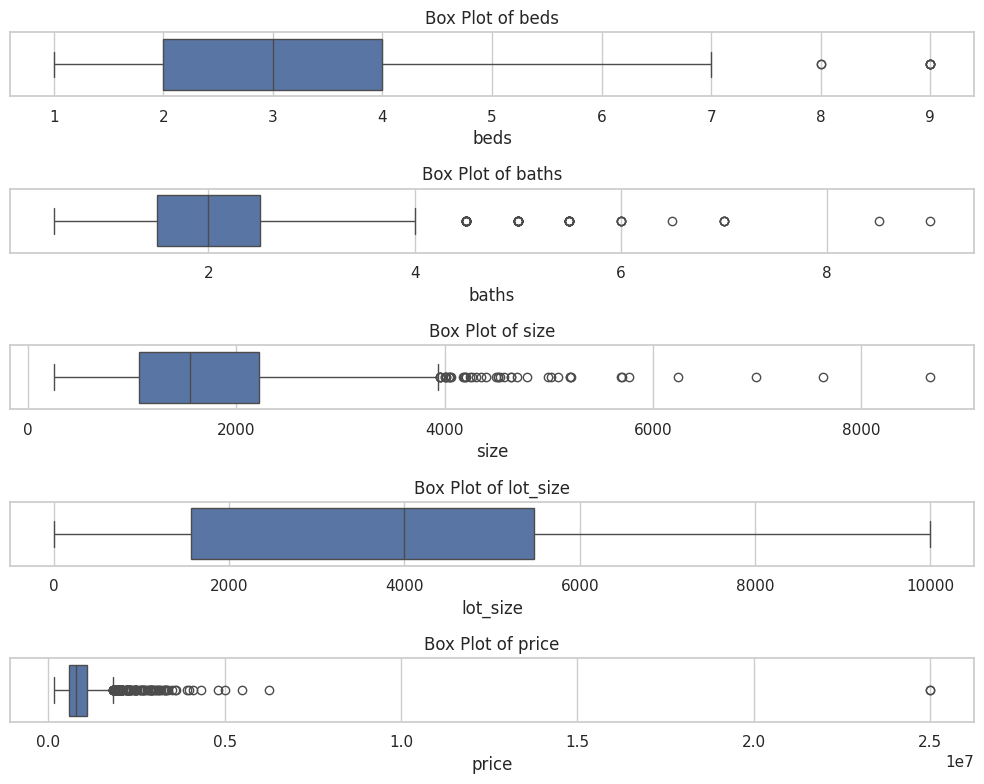

In [ ]:
# Visualizing outliers with box plots for key numerical features
features = ['beds', 'baths', 'size', 'lot_size', 'price']
plt.figure(figsize=(10, 8))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x=train_df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
for feature in ['beds', 'baths','size', 'price']:
    Q1 = train_df[feature].quantile(0.15)
    Q3 = train_df[feature].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train_df[feature] = np.where(train_df[feature] < lower_bound, lower_bound, train_df[feature])
    train_df[feature] = np.where(train_df[feature] > upper_bound, upper_bound, train_df[feature])


<ipython-input-37-e5ee14889ba3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature] = np.where(train_df[feature] < lower_bound, lower_bound, train_df[feature])
<ipython-input-37-e5ee14889ba3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature] = np.where(train_df[feature] > upper_bound, upper_bound, train_df[feature])
<ipython-input-37-e5ee14889ba3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2014 non-null   float64
 1   baths           2014 non-null   float64
 2   size            2014 non-null   float64
 3   size_units      2014 non-null   int64  
 4   lot_size        2014 non-null   float64
 5   lot_size_units  2014 non-null   int64  
 6   zip_code        2014 non-null   int64  
 7   price           2014 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 141.6 KB


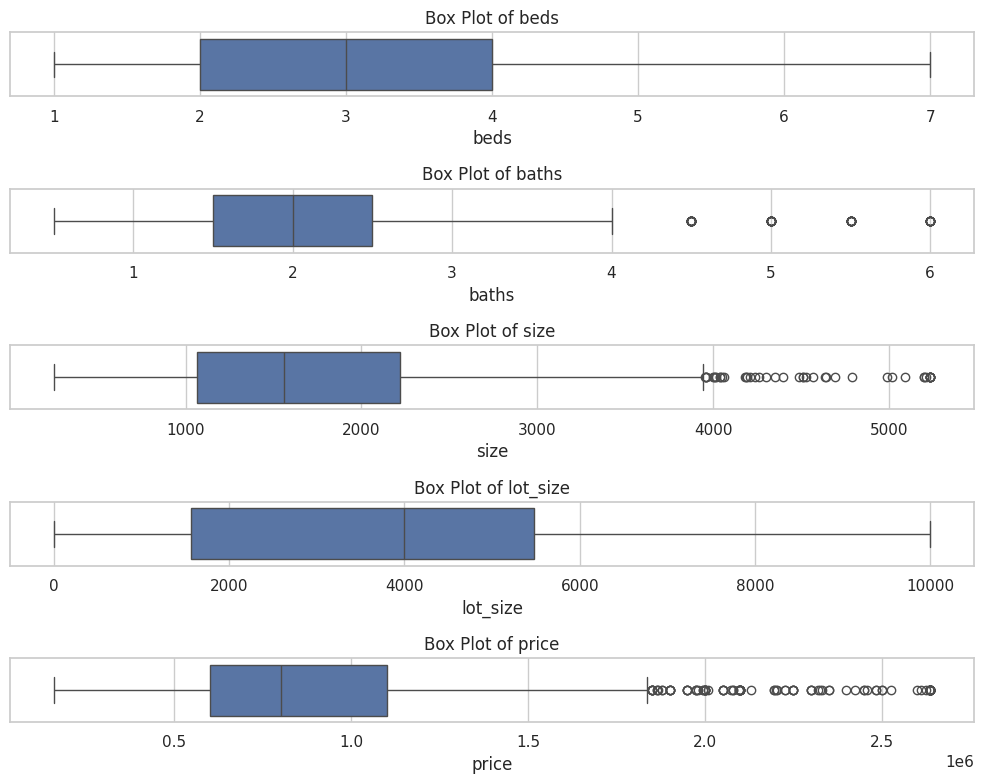

In [ ]:
# Visualizing outliers with box plots for key numerical features
features = ['beds', 'baths', 'size', 'lot_size', 'price']
plt.figure(figsize=(10, 8))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x=train_df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
train_df.describe()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
count,2014.000000,2014.000000,2014.000000,2014.0,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,2.840119,2.151688,1725.081691,0.0,3894.652582,0.891261,98123.653426,9.249688e+05
std,1.175279,0.972526,869.685057,0.0,2474.265802,0.311389,22.657169,4.918689e+05
min,1.000000,0.500000,250.000000,0.0,0.230000,0.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1066.250000,0.0,1564.250000,1.000000,98108.000000,6.012500e+05
50%,3.000000,2.000000,1560.000000,0.0,4000.000000,1.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2220.000000,0.0,5480.000000,1.000000,98126.000000,1.100300e+06
max,7.000000,6.000000,5235.075000,0.0,9998.000000,1.000000,98199.000000,2.636875e+06


# Testing Dataset outliers

In [ ]:
test_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,0,4200.00,1,98119,1175000.0
1,4,5.0,3040.0,0,5002.00,1,98106,1057500.0
2,3,1.0,1290.0,0,6048.00,1,98125,799000.0
3,3,2.0,2360.0,0,0.28,0,98188,565000.0
4,3,3.5,1942.0,0,1603.00,1,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,0,0.30,0,98146,3800000.0
501,3,2.5,1390.0,0,1570.00,1,98126,575000.0
502,3,2.5,2950.0,0,0.47,0,98118,3105000.0
503,5,5.0,3010.0,0,4887.00,1,98115,1807000.0


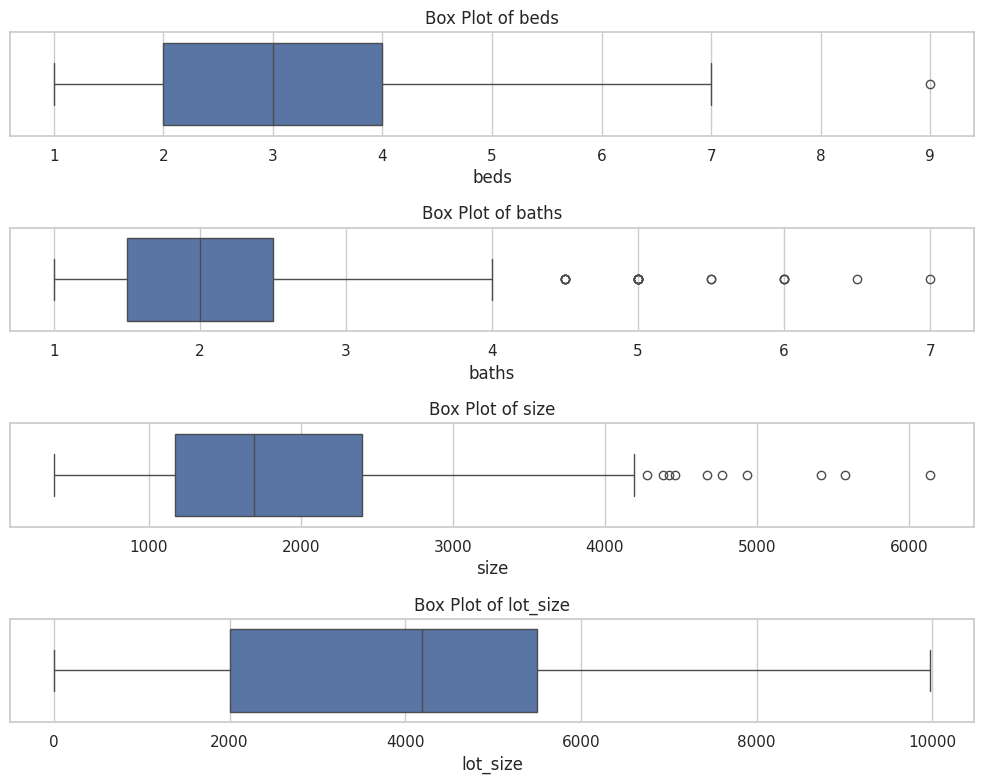

In [ ]:
# Visualizing outliers with box plots for key numerical features
features = ['beds', 'baths', 'size', 'lot_size']
plt.figure(figsize=(10, 8))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x=test_df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
for feature in ['beds', 'baths','size']:
    Q1 = test_df[feature].quantile(0.15)
    Q3 = test_df[feature].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    test_df[feature] = np.where(test_df[feature] < lower_bound, lower_bound, test_df[feature])
    test_df[feature] = np.where(test_df[feature] > upper_bound, upper_bound, test_df[feature])


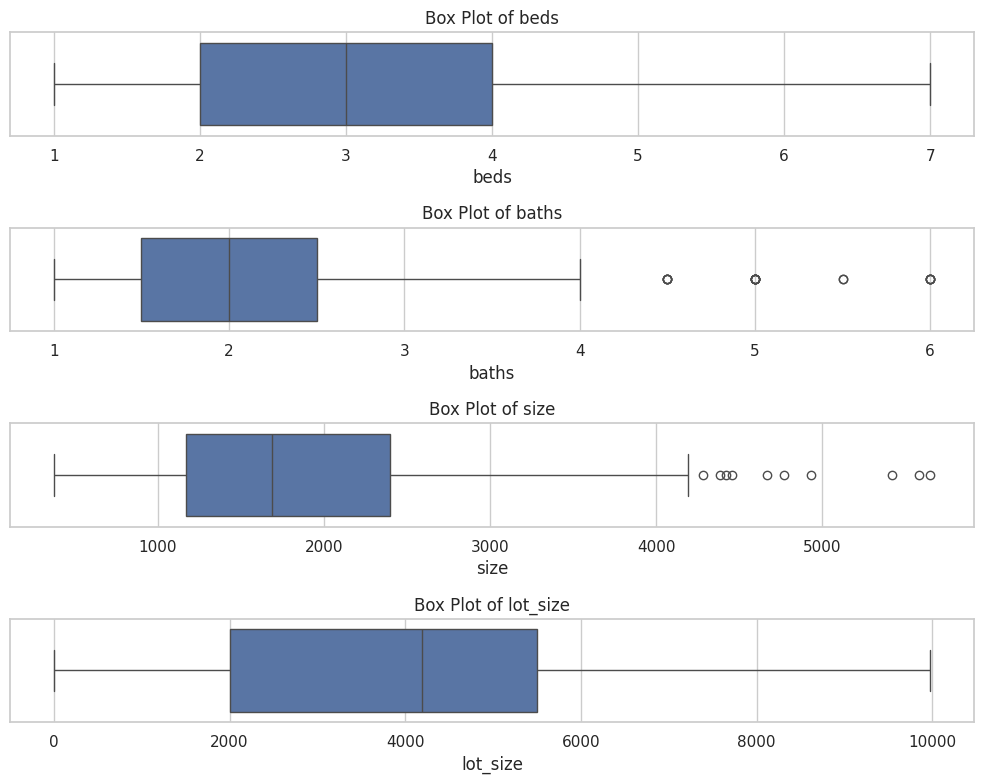

In [ ]:
# Visualizing outliers with box plots for key numerical features
features = ['beds', 'baths', 'size', 'lot_size']
plt.figure(figsize=(10, 8))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x=test_df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    float64
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    int64  
 4   lot_size        505 non-null    float64
 5   lot_size_units  505 non-null    int64  
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 31.7 KB


In [ ]:
test_df.describe()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
count,505.000000,505.000000,505.000000,505.0,505.000000,505.000000,505.000000,5.050000e+02
mean,2.950495,2.216832,1850.875248,0.0,4024.274851,0.883168,98125.366337,9.795822e+05
std,1.198347,1.000998,918.294137,0.0,2483.406930,0.321538,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.0,0.230000,0.000000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,0.0,2000.000000,1.000000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,0.0,4190.000000,1.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,0.0,5500.000000,1.000000,98126.000000,1.155000e+06
max,7.000000,6.000000,5650.000000,0.0,9974.000000,1.000000,98199.000000,6.250000e+06


In [ ]:
# Drop unnecessary columns
train_df.drop(['size_units', 'lot_size_units'], axis=1, inplace=True)
test_df.drop(['size_units', 'lot_size_units'], axis=1, inplace=True)

<ipython-input-47-8f606cbf9613>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['size_units', 'lot_size_units'], axis=1, inplace=True)


In [ ]:
X = train_df.drop('price', axis=1)
y = train_df['price']

# train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Import all models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import lightgbm as lgbm
from catboost import CatBoostRegressor

# start with base models

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': Pipeline(steps=[('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())]),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'XGBoost': XGBRegressor(),
    'LightGBM': lgbm.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    # 'KNN Regressor': KNeighborsRegressor(),  # Uncomment if using
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    # 'Gaussian Process Regression': GaussianProcessRegressor(),  # Uncomment if using
    'AdaBoost Regressor': AdaBoostRegressor()
}

In [ ]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred_train = model.predict(X_train)  # Predict on training set
    y_pred_test = model.predict(X_test)  # Predict on test set
    r2_train = r2_score(y_train, y_pred_train)  # Calculate R2 score for training set
    r2_test = r2_score(y_test, y_pred_test)  # Calculate R2 score for test set
    results[name] = {'R2 Train': r2_train, 'R2 Test': r2_test}  # Store results

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T

# Display the results
results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 1611, number of used features: 5
[LightGBM] [Info] Start training from score 922290.896958


,R2 Train,R2 Test
Linear Regression,0.630862,0.684406
Ridge Regression,0.630862,0.684403
Lasso Regression,0.630862,0.684406
Elastic Net Regression,0.625247,0.678117
Polynomial Regression,0.672349,0.706699
Decision Tree Regressor,0.999819,0.557729
Random Forest Regressor,0.959055,0.743772
Extra Trees Regressor,0.999819,0.725513
Bayesian Ridge Regression,0.614807,0.667246
XGBoost,0.986575,0.753683


In [ ]:
# Sort the DataFrame by the 'R2 Test' column in ascending order
sorted_results_df = results_df.sort_values(by='R2 Test', ascending=False)

# Display the sorted DataFrame
print(sorted_results_df)

                             R2 Train   R2 Test
CatBoost                     0.929570  0.780895
LightGBM                     0.901765  0.771257
Gradient Boosting Regressor  0.822000  0.763076
XGBoost                      0.986575  0.753683
Random Forest Regressor      0.959055  0.743772
Extra Trees Regressor        0.999819  0.725513
Polynomial Regression        0.672349  0.706699
Linear Regression            0.630862  0.684406
Lasso Regression             0.630862  0.684406
Ridge Regression             0.630862  0.684403
Elastic Net Regression       0.625247  0.678117
Bayesian Ridge Regression    0.614807  0.667246
AdaBoost Regressor           0.565893  0.560033
Decision Tree Regressor      0.999819  0.557729


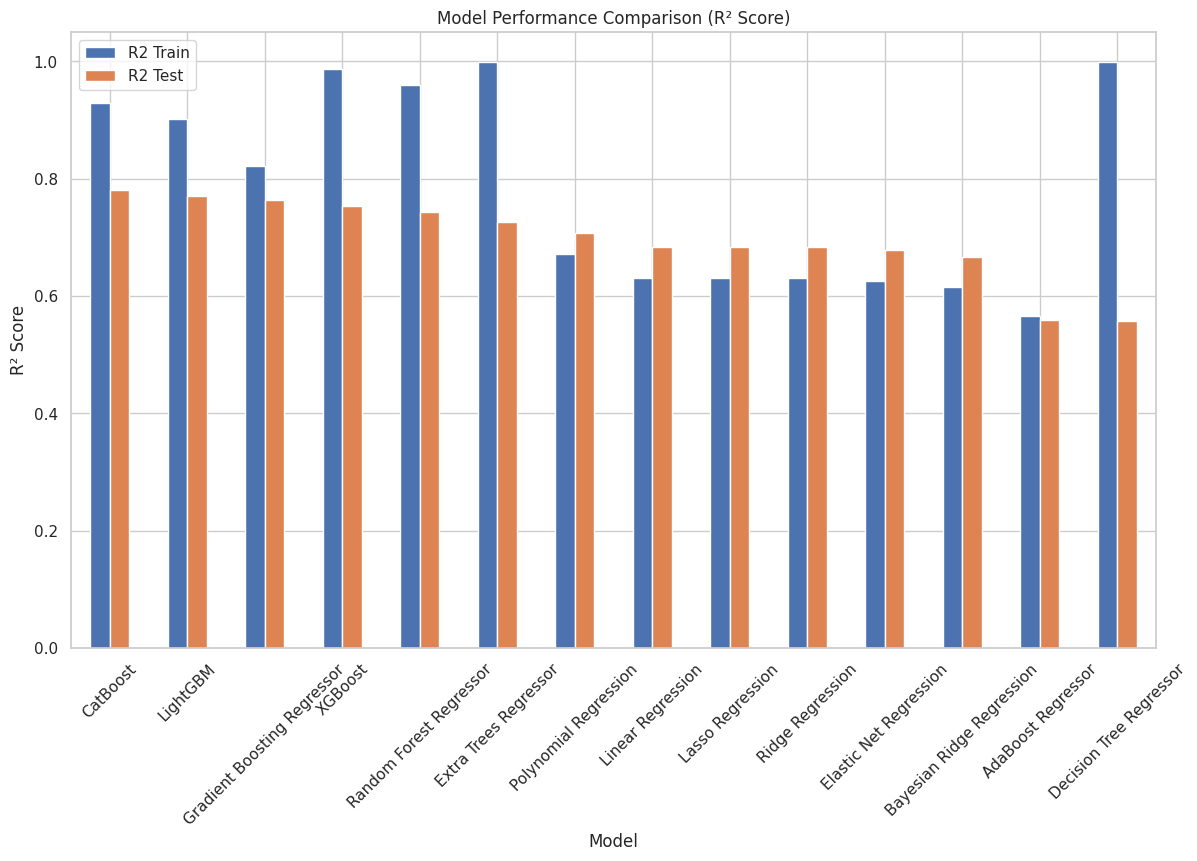

In [ ]:
# Plotting model performance
sorted_results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

# Add Some Hyperparameters tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import lightgbm as lgbm
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': Pipeline(steps=[('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())]),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'XGBoost': XGBRegressor(),
    'LightGBM': lgbm.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

In [ ]:
# Define parameter spaces
param_grids = {
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.0001, 0.001, 0.01, 0.1]},
    'Elastic Net Regression': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
    'Bayesian Ridge Regression': {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4]},
    'AdaBoost Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Polynomial Regression': {'poly__degree': [1, 2, 3], 'linear__fit_intercept': [True, False]}
}

param_distributions = {
    'Random Forest Regressor': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None]},
    'Decision Tree Regressor': {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
    'Extra Trees Regressor': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None]},
    'Gradient Boosting Regressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
}

bayes_param_spaces = {
    'XGBoost': {
        'n_estimators': Integer(100, 500),
        'learning_rate': Real(0.01, 0.2),
        'max_depth': Integer(3, 10)
    },
    'LightGBM': {
        'n_estimators': Integer(100, 500),
        'learning_rate': Real(0.01, 0.2),
        'num_leaves': Integer(31, 100)
    },
    'CatBoost': {
        'iterations': Integer(100, 500),
        'learning_rate': Real(0.01, 0.2),
        'depth': Integer(4, 10)
    }
}


In [ ]:

# Hyperparameter tuning and model evaluation
results = {}

for name, model in models.items():
    print(f"Processing {name}...")
    try:
        if name in param_grids:
            grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, verbose=1)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        elif name in param_distributions:
            random_search = RandomizedSearchCV(model, param_distributions[name], n_iter=10, cv=5, n_jobs=-1, verbose=1)
            random_search.fit(X_train, y_train)
            best_model = random_search.best_estimator_
        elif name in bayes_param_spaces:
            bayes_search = BayesSearchCV(model, bayes_param_spaces[name], n_iter=32, cv=5, n_jobs=-1, verbose=1)
            bayes_search.fit(X_train, y_train)
            best_model = bayes_search.best_estimator_
        else:
            model.fit(X_train, y_train)
            best_model = model

        # Evaluate on training data
        y_pred_train = best_model.predict(X_train)
        r2_train = r2_score(y_train, y_pred_train)

        # Evaluate on testing data
        y_pred_test = best_model.predict(X_test)
        r2_test = r2_score(y_test, y_pred_test)

        # Store the scores
        results[name] = {'R2 Train': r2_train, 'R2 Test': r2_test}
    except Exception as e:
        print(f"An error occurred with {name}: {e}")

results_df_hypertuned_models = pd.DataFrame(results).T
results_df_hypertuned_models

Processing Linear Regression...
Processing Ridge Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Processing Lasso Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Processing Elastic Net Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Processing Polynomial Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Processing Decision Tree Regressor...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Processing Random Forest Regressor...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Processing Extra Trees Regressor...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Processing Bayesian Ridge Regression...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Processing XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Processing AdaBoost Regressor...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


,R2 Train,R2 Test
Linear Regression,0.630862,0.684406
Ridge Regression,0.630857,0.684375
Lasso Regression,0.630862,0.684406
Elastic Net Regression,0.630854,0.684364
Polynomial Regression,0.705151,0.704001
Decision Tree Regressor,0.732440,0.607733
Random Forest Regressor,0.960325,0.745819
Extra Trees Regressor,0.999512,0.721301
Bayesian Ridge Regression,0.614807,0.667246
XGBoost,0.901415,0.766934


In [ ]:
# Sort the DataFrame by the 'R2 Test' column in ascending order
sorted_results_df_hypertuned_models = results_df_hypertuned_models.sort_values(by='R2 Test', ascending=False)

# Display the sorted DataFrame
print(sorted_results_df_hypertuned_models)

                             R2 Train   R2 Test
CatBoost                     0.912708  0.777826
LightGBM                     0.894579  0.772510
XGBoost                      0.901415  0.766934
Gradient Boosting Regressor  0.865475  0.760872
Random Forest Regressor      0.960325  0.745819
Extra Trees Regressor        0.999512  0.721301
Polynomial Regression        0.705151  0.704001
Linear Regression            0.630862  0.684406
Lasso Regression             0.630862  0.684406
Ridge Regression             0.630857  0.684375
Elastic Net Regression       0.630854  0.684364
Bayesian Ridge Regression    0.614807  0.667246
AdaBoost Regressor           0.673383  0.659209
Decision Tree Regressor      0.732440  0.607733
